### Things to add

- deeper dive into counts
- swing decision chart (in-zone / out of zone swing %)
- batted ball profiles

# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Spray Chart](#Spray-Chart)
    - [PHI Home Field Spray Chart](#PHI-Spray-Chart)
- [Batted Ball Profiles](#Batted-Ball-Profiles)
    - [Quality Contact by Launch Angle & Exit Velocity](#Quality-Contact-by-Launch-Angle-&-Exit-Velocity)
    - [ISO Value by Launch Angle & Exit Velocity](#ISO-Value-by-Launch-Angle-&-Exit-Velocity)
    - [BABIP Value by Launch Angle & Exit Velocity](#BABIP-Value-by-Launch-Angle-&-Exit-Velocity)
    - [wOBA Value by Launch Angle & Exit Velocity](#[wOBA-Value-by-Launch-Angle-&-Exit-Velocity)
    - [Estimated wOBA by Launch Angle & Exit Velocity](#Estimated-wOBA-by-Launch-Angle-&-Exit-Velocity)
    - [Estimated BA by Launch Angle & Exit Velocity](#Estimated-BA-by-Launch-Angle-&-Exit-Velocity)
    - [Home Runs by Launch Angle and Exit Velocity](#Home-Runs-by-Launch-Angle-and-Exit-Velocity)
    - [xwOBA Against EV](#xwOBA-Against-EV)
    - [xwOBA Value of a Hit Against Its Exit Velocity](#xwOBA-Value-of-a-Hit-Against-Its-Exit-Velocity)
- [Pitch Usage & Counts](#Pitch-Usage-&-Counts)
    - [Pitch Usage by Pitcher Handedness](#Pitch-Usage-by-Pitcher-Handedness)
    - [Pitch Type by Count](#Pitch-Type-by-Count)
- [Pitch Location](#Pitch-Locations)
    - [Pitch Location - All-Pitches](#Pitch-Location--All-Pitches)
- [Heatmaps](#Heatmaps)
    - [Fastball Heatmaps](#Fastball-Heatmaps)
    - [Slider Heatmaps](#Slider-Heatmaps)
    - [Changeup Heatmaps](#Changeup-Heatmaps)
    - [Sinker Heatmaps](#Sinker-Heatmaps)
    - [Curveball Heatmaps](#Curveball-Heatmaps)
    - [Cutter Heatmaps](#Cutter-Heatmaps)
    - [Split-Finger Heatmaps](#Split-Finger-Heatmaps)
    - [Knuckle Curve Heatmaps](#Knuckle-Curve-Heatmaps)
    - [Slow Curve Heatmaps](#Slow-Curve-Heatmaps)

# Imports

In [15]:
from pybaseball import spraychart
from pybaseball.plotting import plot_bb_profile
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [16]:
harper = pd.read_csv('../data/bryce-harper.csv')
harper.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(harper.shape)
harper.head(2)

(2401, 91)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,swing_miss,first_pitch_take,first_pitch_swing
0,SL,2021-10-03,84.5,3.50,5.43,"Harper, Bryce",547180,595345,walk,ball,13,Bryce Harper walks.,R,L,L,MIA,PHI,B,NaN,NaN,3,2,2021,-0.56,3.72,-1.04,1.84,NaN,NaN,NaN,1,3,Top,NaN,NaN,663743,-9.466082,-122.817284,-2.673045,-4.020395,22.005665,-28.692107,3.01,1.68,NaN,NaN,NaN,84.9,2438.0,6.4,632246,595345,663743,650331,657193,571918,665862,675649,642423,650559,54.10,NaN,NaN,0.7,1.0,0.0,0.0,NaN,22,6,Slider,3,1,1,3,1,3,1,3,Infield shift,Strategic,245.0,-0.028,0.214,0,3-2,1.04,6.72,0,0,0
1,SL,2021-10-03,83.0,3.48,5.51,"Harper, Bryce",547180,595345,NaN,called_strike,8,Bryce Harper walks.,R,L,L,MIA,PHI,S,NaN,NaN,3,1,2021,-0.62,3.24,0.10,1.72,NaN,NaN,NaN,1,3,Top,NaN,NaN,663743,-6.535792,-120.815188,-2.778350,-4.958802,21.662092,-29.168556,2.93,1.51,NaN,NaN,NaN,83.7,2412.0,6.5,632246,595345,663743,650331,657193,571918,665862,675649,642423,650559,53.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,5,Slider,3,1,1,3,1,3,1,3,Infield shift,Strategic,252.0,0.000,-0.065,1,3-1,-0.10,7.44,0,0,0


In [17]:
zero_zero = harper.loc[(harper['pitch_count'] == '0-0')]
zero_zero.description.value_counts()

ball               254
called_strike       94
swinging_strike     88
foul                87
hit_into_play       61
hit_by_pitch         2
bunt_foul_tip        1
Name: description, dtype: int64

In [18]:
harper.groupby(['bb_type']).mean()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,swing_miss,first_pitch_take,first_pitch_swing
bb_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fly_ball,88.564211,-1.054211,5.962316,547180.0,592200.505263,5.978947,7.573529,1.168421,1.094737,2021.0,-0.288737,8.117053,-0.054842,2.471368,569179.000000,542515.600000,532783.461538,1.052632,4.747368,117.986596,75.823085,586397.915789,3.155031,-128.824571,-3.874519,-4.175172,26.932776,-23.264076,3.49,1.6,339.368421,96.473684,36.136842,88.378947,2169.589474,6.189474,633292.968421,592200.505263,586397.915789,572297.052632,614308.084211,602896.021053,596354.431579,600799.189474,618019.557895,620014.663158,54.312000,0.393579,0.724905,0.700526,1.000000,0.094737,0.957895,4.442105,36.400000,3.452632,1.863158,2.305263,2.178947,1.989474,2.526316,2.084211,2.621053,1.989474,185.515789,-0.000863,0.266474,1.0,0.054842,3.464842,0.0,0.0,0.157895
ground_ball,88.262252,-0.642781,5.867086,547180.0,591014.847682,7.907285,4.615894,0.947020,1.079470,2021.0,-0.330331,5.095629,-0.097152,2.186887,589199.384615,543461.842105,557742.818182,0.927152,4.549669,142.059536,150.424503,577740.589404,2.145562,-128.377173,-3.788881,-4.531575,26.668503,-25.947846,3.49,1.6,39.847682,83.781457,-10.139073,88.319205,2154.350993,6.343709,633286.258278,591014.847682,577740.589404,566480.192053,617128.788079,614161.019868,595961.370861,597757.682119,614179.947020,615989.788079,54.156755,0.269013,0.250205,0.260596,0.986755,0.258278,0.046358,2.456954,34.860927,3.185430,2.238411,1.993377,2.006623,2.225166,2.039735,2.258278,2.072848,2.225166,198.953642,-0.003603,-0.046132,1.0,0.097152,3.963974,0.0,0.0,0.198675
line_drive,88.665306,-0.870000,5.974898,547180.0,599212.693878,7.132653,7.900000,1.346939,1.204082,2021.0,-0.309898,6.666122,-0.118878,2.293061,577683.750000,549698.789474,559579.666667,1.091837,4.520408,122.325510,90.585510,568742.112245,2.563957,-128.956645,-4.133356,-4.137005,26.760017,-24.528293,3.49,1.6,274.153061,98.775510,16.959184,88.580612,2189.306122,6.242857,633362.887755,599212.693878,568742.112245,559490.336735,621234.244898,601332.071429,603114.500000,595345.714286,617625.051020,621542.918367,54.259592,0.697745,0.805418,0.874490,1.000000,0.693878,0.520408,4.622449,35.071429,3.775510,1.734694,2.183673,2.102041,1.816327,2.295918,1.948980,2.428571,1.816327,191.806122,0.010531,0.458469,1.0,0.118878,3.718776,0.0,0.0,0.122449
popup,88.831250,-0.423125,6.035000,547180.0,601562.187500,5.812500,5.250000,0.875000,0.937500,2021.0,-0.128125,9.502500,0.146875,2.668750,664761.000000,567586.250000,544248.500000,1.062500,6.312500,116.066250,162.363125,569442.687500,1.797771,-129.163993,-3.881412,-2.049034,27.540063,-21.574311,3.49,1.6,123.687500,80.425000,66.812500,88.281250,2341.375000,6.025000,633704.187500,601562.187500,569442.687500,551861.062500,586454.062500,580164.437500,578343.562500,584574.437500,634754.500000,605272.437500,54.491250,0.016500,0.016375,0.000000,1.000000,0.000000,0.000000,2.875000,51.000000,2.875000,3.562500,2.875000,3.125000,3.312500,2.875000,3.562500,3.125000,3.312500,173.187500,0.007812,-0.247188,1.0,-0.146875,1.537500,0.0,0.0,0.250000


In [19]:
full_count = harper.loc[harper['pitch_count'] == '3-2']
r_harper = harper.loc[harper['p_throws'] == 'R']
l_harper = harper.loc[harper['p_throws'] == 'L']

ff = harper.loc[harper['pitch_type'] == 'FF']
sl = harper.loc[harper['pitch_type'] == 'SL']
ch = harper.loc[harper['pitch_type'] == 'CH']
si = harper.loc[harper['pitch_type'] == 'SI']
cu = harper.loc[harper['pitch_type'] == 'CU']
fc = harper.loc[harper['pitch_type'] == 'FC']
fs = harper.loc[harper['pitch_type'] == 'FS']
kc = harper.loc[harper['pitch_type'] == 'KC']
cs = harper.loc[harper['pitch_type'] == 'CS']

r_ff = harper.loc[(harper['pitch_type'] == 'FF') & (harper['p_throws'] == 'R')]
r_sl = harper.loc[(harper['pitch_type'] == 'SL') & (harper['p_throws'] == 'R')]
r_ch = harper.loc[(harper['pitch_type'] == 'CH') & (harper['p_throws'] == 'R')]
r_si = harper.loc[(harper['pitch_type'] == 'SI') & (harper['p_throws'] == 'R')]
r_cu = harper.loc[(harper['pitch_type'] == 'CU') & (harper['p_throws'] == 'R')]
r_fc = harper.loc[(harper['pitch_type'] == 'FC') & (harper['p_throws'] == 'R')]
r_fs = harper.loc[(harper['pitch_type'] == 'FS') & (harper['p_throws'] == 'R')]
r_kc = harper.loc[(harper['pitch_type'] == 'KC') & (harper['p_throws'] == 'R')]
r_cs = harper.loc[(harper['pitch_type'] == 'CS') & (harper['p_throws'] == 'R')]

l_ff = harper.loc[(harper['pitch_type'] == 'FF') & (harper['p_throws'] == 'L')]
l_sl = harper.loc[(harper['pitch_type'] == 'SL') & (harper['p_throws'] == 'L')]
l_ch = harper.loc[(harper['pitch_type'] == 'CH') & (harper['p_throws'] == 'L')]
l_si = harper.loc[(harper['pitch_type'] == 'SI') & (harper['p_throws'] == 'L')]
l_cu = harper.loc[(harper['pitch_type'] == 'CU') & (harper['p_throws'] == 'L')]
l_fc = harper.loc[(harper['pitch_type'] == 'FC') & (harper['p_throws'] == 'L')]
l_fs = harper.loc[(harper['pitch_type'] == 'FS') & (harper['p_throws'] == 'L')]
l_kc = harper.loc[(harper['pitch_type'] == 'KC') & (harper['p_throws'] == 'L')]
l_cs = harper.loc[(harper['pitch_type'] == 'CS') & (harper['p_throws'] == 'L')]

# Spray Chart

### PHI Spray Chart

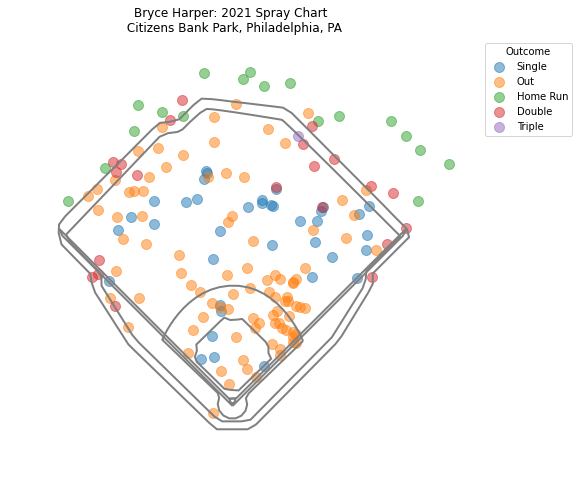

In [6]:
spray_phi = harper[harper['home_team'] == 'PHI']
spray_phi = spray_phi.loc[spray_phi['events'] != 'sac_bunt']
spraychart(spray_phi, 'phillies', 
           title = 'Bryce Harper: 2021 Spray Chart \n Citizens Bank Park, Philadelphia, PA');

# Batted Ball Profiles

### Quality Contact by Launch Angle & Exit Velocity

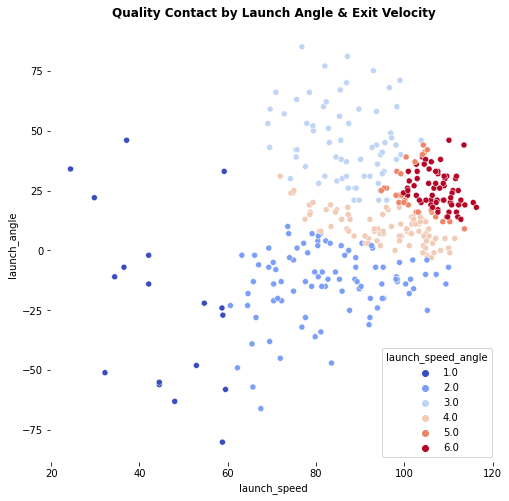

In [20]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'launch_speed_angle', 
                palette = 'coolwarm')
plt.title('Quality Contact by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### ISO Value by Launch Angle & Exit Velocity

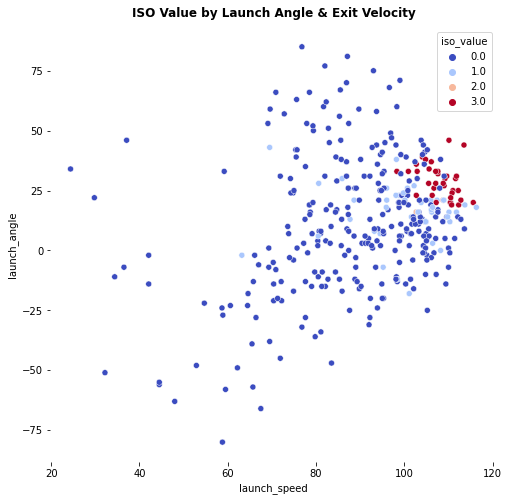

In [21]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'iso_value', 
                palette = 'coolwarm')
plt.title('ISO Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### BABIP Value by Launch Angle & Exit Velocity

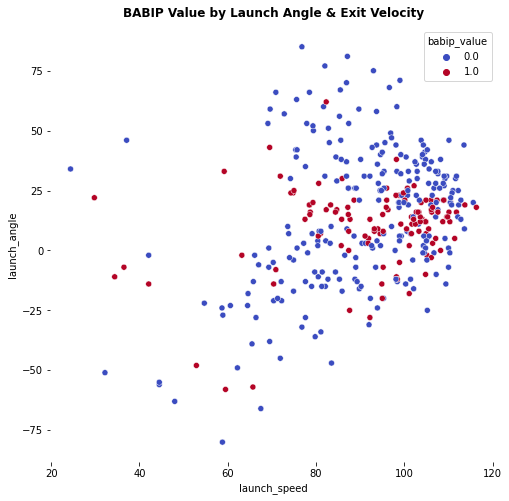

In [22]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'babip_value', 
                palette = 'coolwarm')
plt.title('BABIP Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### wOBA Value by Launch Angle & Exit Velocity

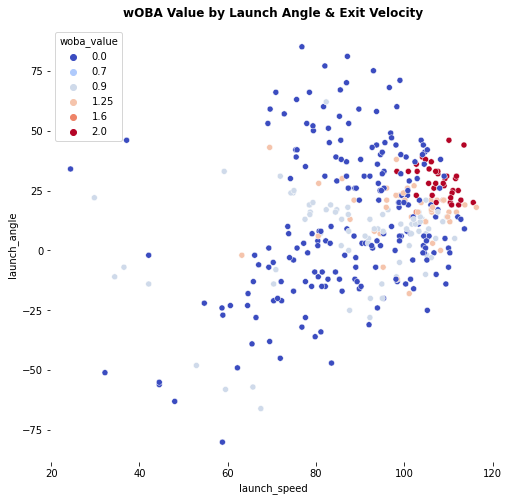

In [23]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'woba_value', 
                palette = 'coolwarm')
plt.title('wOBA Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### Estimated wOBA by Launch Angle & Exit Velocity

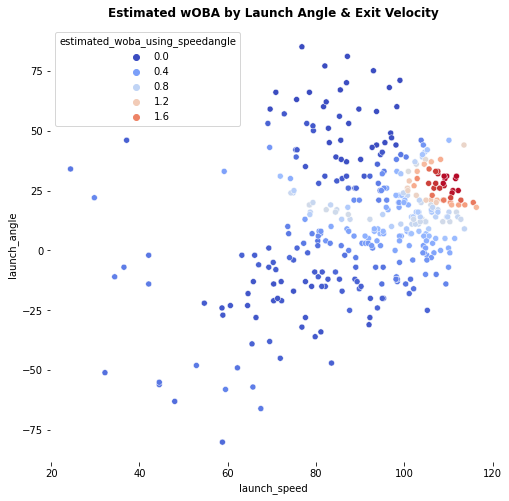

In [24]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'estimated_woba_using_speedangle', 
                palette = 'coolwarm')
plt.title('Estimated wOBA by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### Estimated BA by Launch Angle & Exit Velocity

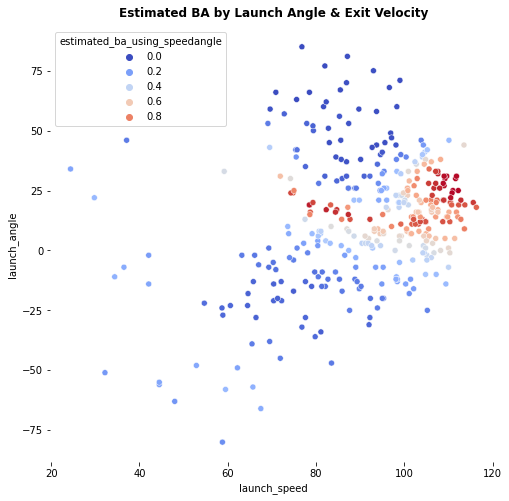

In [25]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'estimated_ba_using_speedangle', 
                palette = 'coolwarm')
plt.title('Estimated BA by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);
# plt.title('Hit probability by Launch Angle and Exit Velocity', fontdict = font_title, pad = 15);

### Home Runs by Launch Angle and Exit Velocity

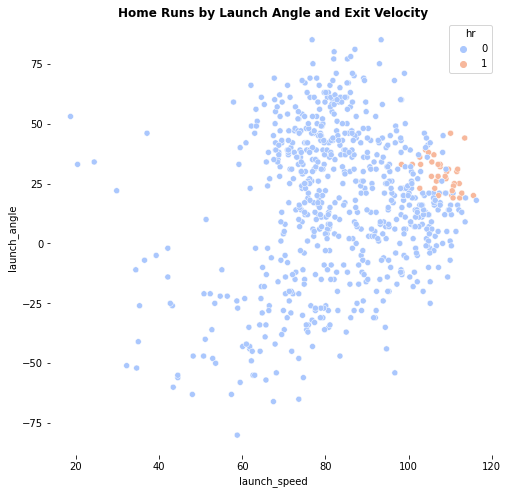

In [37]:
harper['hr'] = [1 if x == 'home_run' else 0 for x in harper['events']]

fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'hr', palette = 'coolwarm')
plt.title('Home Runs by Launch Angle and Exit Velocity', fontdict = font_title);

### xwOBA Against EV

In [38]:
harper.groupby(pd.cut(harper.launch_speed, 6)).mean()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,swing_miss,first_pitch_take,first_pitch_swing,hr
launch_speed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(18.602, 34.967]",85.257143,-0.097143,5.918571,547180.0,576562.571429,10.285714,2.500000,0.857143,1.285714,2021.0,0.138571,5.297143,0.212857,1.895714,NaN,612346.333333,592663.000000,0.857143,4.857143,130.135000,185.422500,580659.142857,0.483666,-123.999584,-4.095338,0.484985,24.356427,-26.587319,3.49,1.6,18.000000,27.785714,4.000000,85.114286,2207.571429,6.157143,633518.000000,576562.571429,580659.142857,586803.000000,626696.285714,621768.142857,598775.142857,626410.428571,586942.714286,641659.571429,54.331429,0.235000,0.225750,0.450000,0.750000,0.500000,0.000000,1.000000,42.000000,3.142857,3.285714,2.857143,4.000000,2.142857,2.857143,3.285714,4.000000,2.142857,173.000000,-0.017000,-0.020429,1.0,-0.212857,-1.662857,0.0,0.0,0.000000,0.000000
"(34.967, 51.233]",85.435294,0.290588,6.053529,547180.0,607968.764706,6.411765,3.857143,0.470588,0.882353,2021.0,0.114118,4.644706,-0.076471,2.145294,NaN,550874.000000,573096.333333,0.529412,4.941176,122.308571,178.555714,610994.823529,-1.135039,-124.285705,-3.689631,1.752931,25.291524,-27.099913,3.49,1.6,10.117647,43.205882,-28.764706,85.170588,2292.000000,6.147059,633205.235294,607968.764706,610994.823529,568800.705882,616175.647059,599408.823529,594179.823529,609252.058824,584090.000000,622033.764706,54.360000,0.195857,0.186714,0.257143,0.857143,0.285714,0.000000,1.000000,38.411765,2.647059,3.000000,2.117647,2.117647,3.000000,2.117647,3.000000,2.117647,3.000000,171.352941,-0.004588,-0.041000,1.0,0.076471,-1.369412,0.0,0.0,0.411765,0.000000
"(51.233, 67.5]",85.396610,-0.584068,5.957288,547180.0,600660.305085,8.593220,4.052632,0.983051,1.067797,2021.0,-0.230000,2.849492,-0.181695,2.341695,560759.500000,520152.166667,553428.125000,1.000000,4.542373,131.474737,169.006316,572379.779661,1.574058,-124.204393,-2.735384,-3.139765,25.637824,-28.110418,3.49,1.6,55.677966,61.762712,-9.491525,85.391525,2223.423729,6.377966,633482.898305,600660.305085,572379.779661,568851.542373,614433.067797,596668.881356,594595.338983,608684.644068,613593.966102,620477.271186,54.124407,0.145842,0.134211,0.302632,1.000000,0.263158,0.052632,1.631579,35.220339,3.118644,2.067797,2.152542,2.118644,2.101695,2.152542,2.084746,2.135593,2.101695,195.813559,0.004661,-0.038051,1.0,0.181695,2.760000,0.0,0.0,0.186441,0.000000
"(67.5, 83.767]",89.807797,-0.585356,5.912678,547180.0,597404.664407,6.576271,5.389610,1.142373,1.027119,2021.0,-0.287153,8.397559,-0.115254,2.480678,601261.111111,537066.488372,543528.979798,1.013559,4.654237,124.526364,141.517922,580971.908475,1.889471,-130.614160,-4.000273,-3.910994,27.916001,-22.681736,3.49,1.6,148.101695,76.348136,23.115254,89.346780,2196.792517,6.241497,633268.535593,597404.664407,580971.908475,571171.484746,614016.277966,602337.020339,601039.854237,595402.698305,617848.098305,622625.335593,54.258136,0.239896,0.224766,0.235714,1.000000,0.246753,0.038961,2.688312,35.613559,3.291525,1.752542,2.054237,1.701695,2.105085,2.071186,1.762712,1.728814,2.105085,192.527211,-0.001105,-0.045895,1.0,0.115254,3.445831,0.0,0.0,0.189831,0.000000
"(83.767, 100.033]",89.770192,-0.735337,5.933510,547180.0,594953.134615,6.759615,6.

### xwOBA Value of a Hit Against Its Exit Velocity

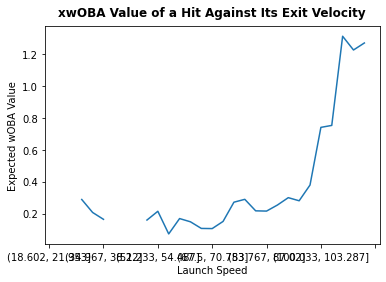

In [39]:
groups = harper.groupby(pd.cut(harper.launch_speed, 30))
ax = groups['estimated_woba_using_speedangle'].mean().plot()
plt.xlabel('Launch Speed'), plt.ylabel('Expected wOBA Value')
plt.title('xwOBA Value of a Hit Against Its Exit Velocity', fontdict = font_title, pad = 15);

# Pitch Usage / Counts

### Pitch Usage by Pitcher Handedness

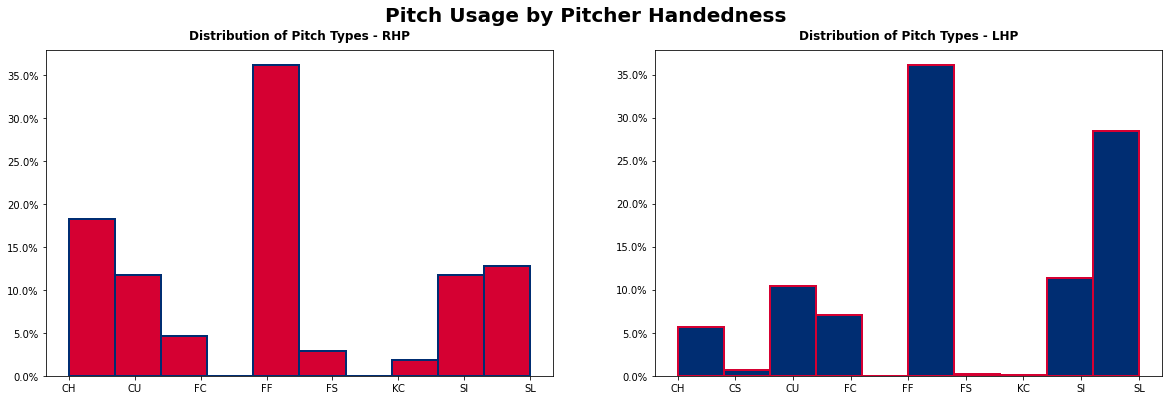

In [7]:
r_harper.dropna(subset=['pitch_type'], inplace = True)
l_harper.dropna(subset=['pitch_type'], inplace = True)

blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Pitcher Handedness', fontsize = 20, fontweight = 'bold')

dist_r = r_harper.pitch_type.sort_values()
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = red, edgecolor = blue, linewidth = 2)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHP', fontdict = font_title, pad = 15)

dist_l = l_harper.pitch_type.sort_values()
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = blue, edgecolor = red, linewidth = 2)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHP', fontdict = font_title, pad = 15);

### Pitch Type by Count

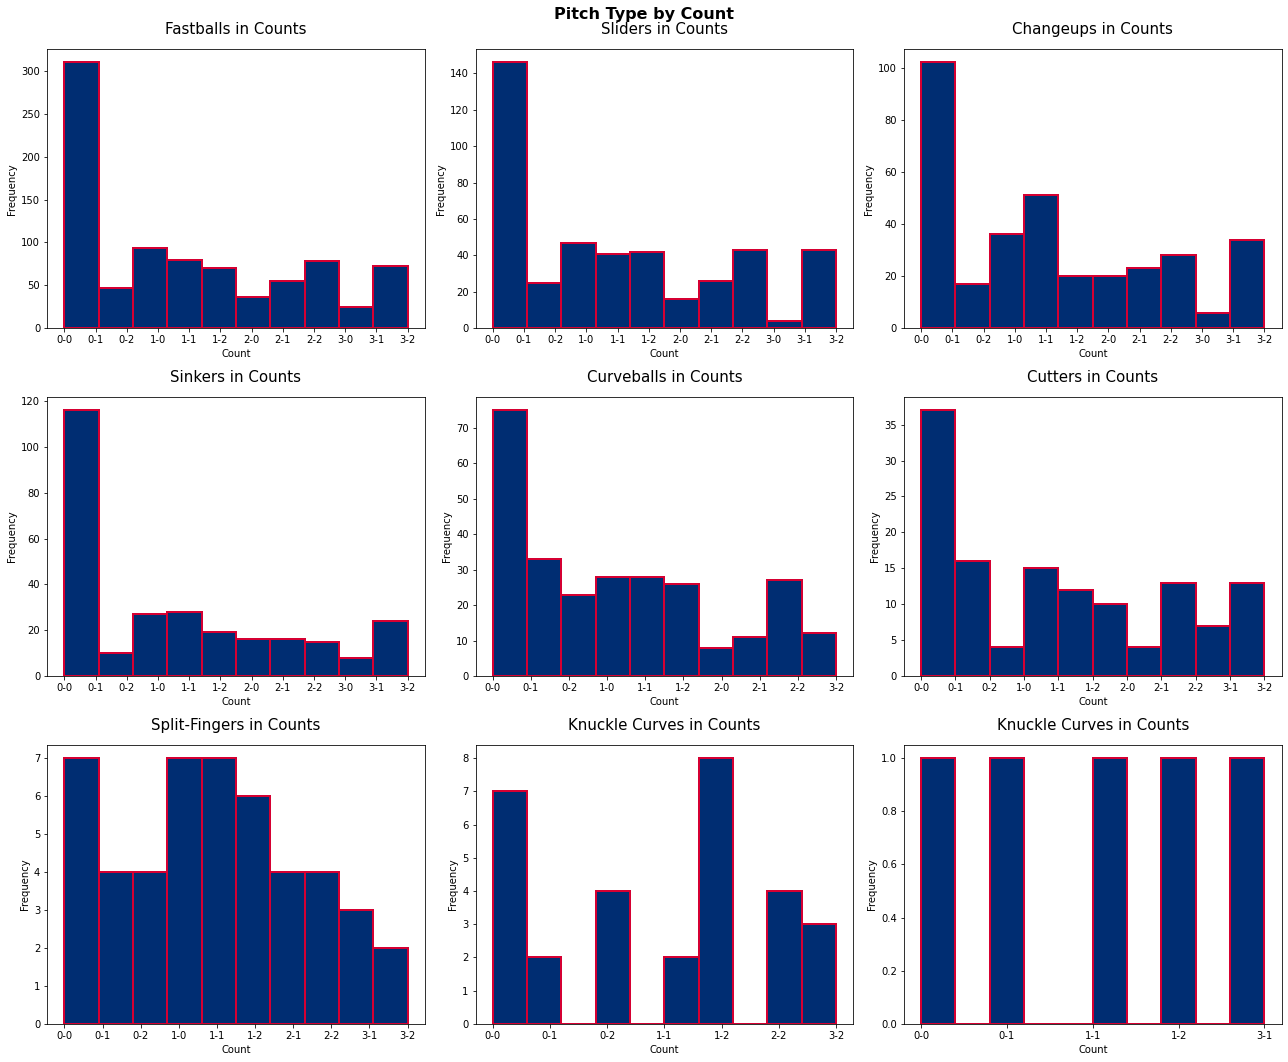

In [8]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15))
fig.suptitle('Pitch Type by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')

axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('Fastballs in Counts', fontsize = 15, pad = 15)

axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Sliders in Counts', fontsize = 15, pad = 15)

axs[0][2].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][2].set_title('Changeups in Counts', fontsize = 15, pad = 15)

axs[1][0].hist(si['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Sinkers in Counts', fontsize = 15, pad = 15)

axs[1][1].hist(cu['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Curveballs in Counts', fontsize = 15, pad = 15)

axs[1][2].hist(fc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][2].set_title('Cutters in Counts', fontsize = 15, pad = 15)

axs[2][0].hist(fs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][0].set_title('Split-Fingers in Counts', fontsize = 15, pad = 15)

axs[2][1].hist(kc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][1].set_title('Knuckle Curves in Counts', fontsize = 15, pad = 15)

axs[2][2].hist(cs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][2].set_title('Knuckle Curves in Counts', fontsize = 15, pad = 15)
plt.tight_layout();

# Pitch Location 

### Pitch Location -  All Pitches

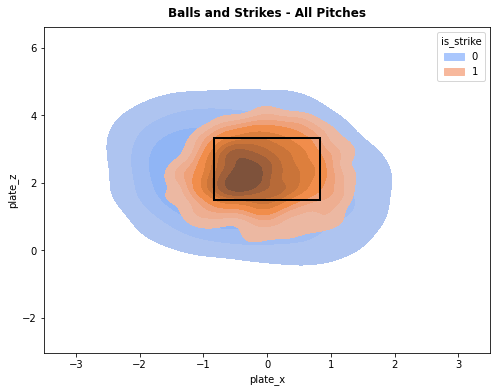

In [9]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = harper, x = 'plate_x', y = 'plate_z', hue = 'is_strike', fill = True, palette = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3.5, 3.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

# Heatmaps

### Fastball Heatmaps

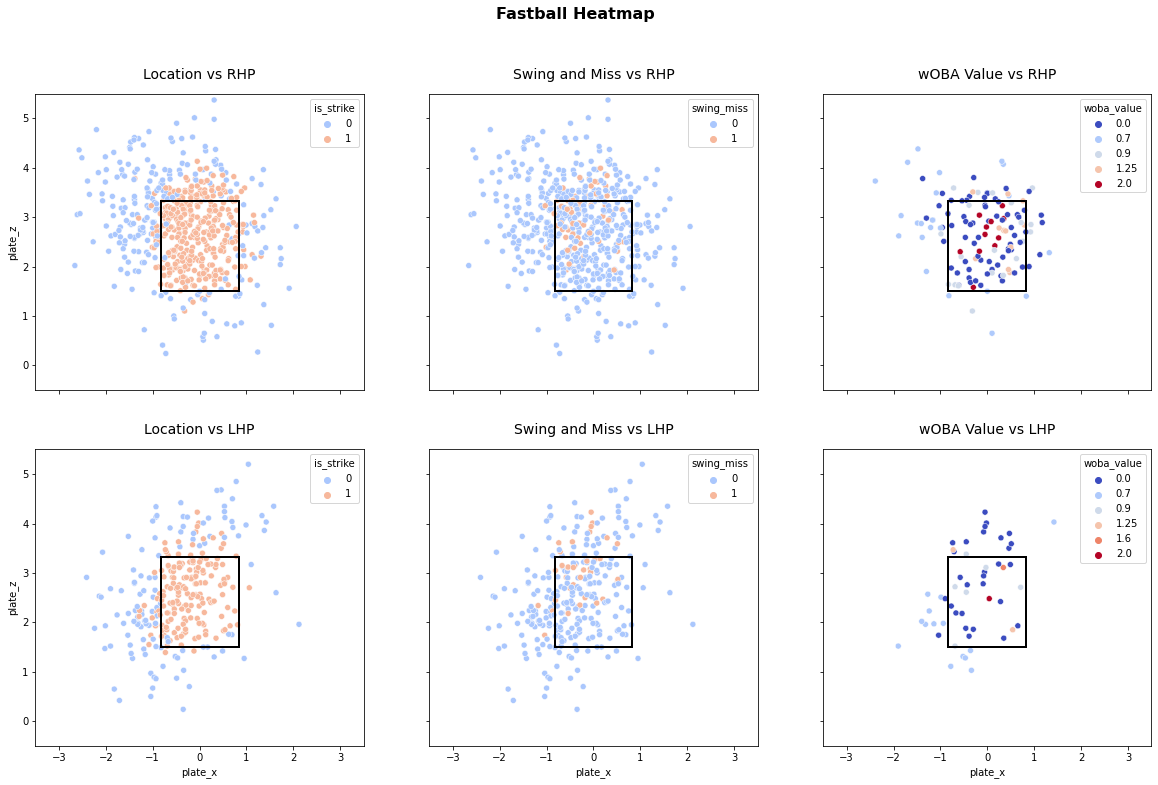

In [10]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Slider Heatmaps

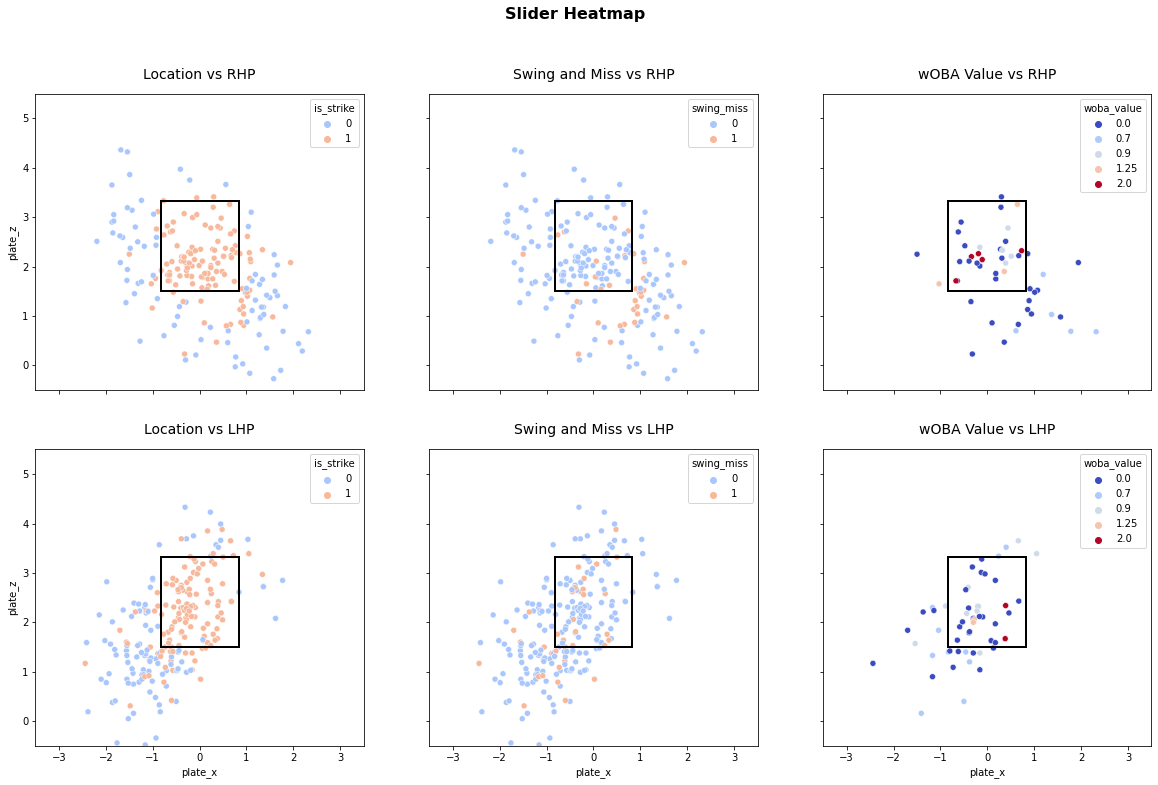

In [11]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Changeup Heatmaps

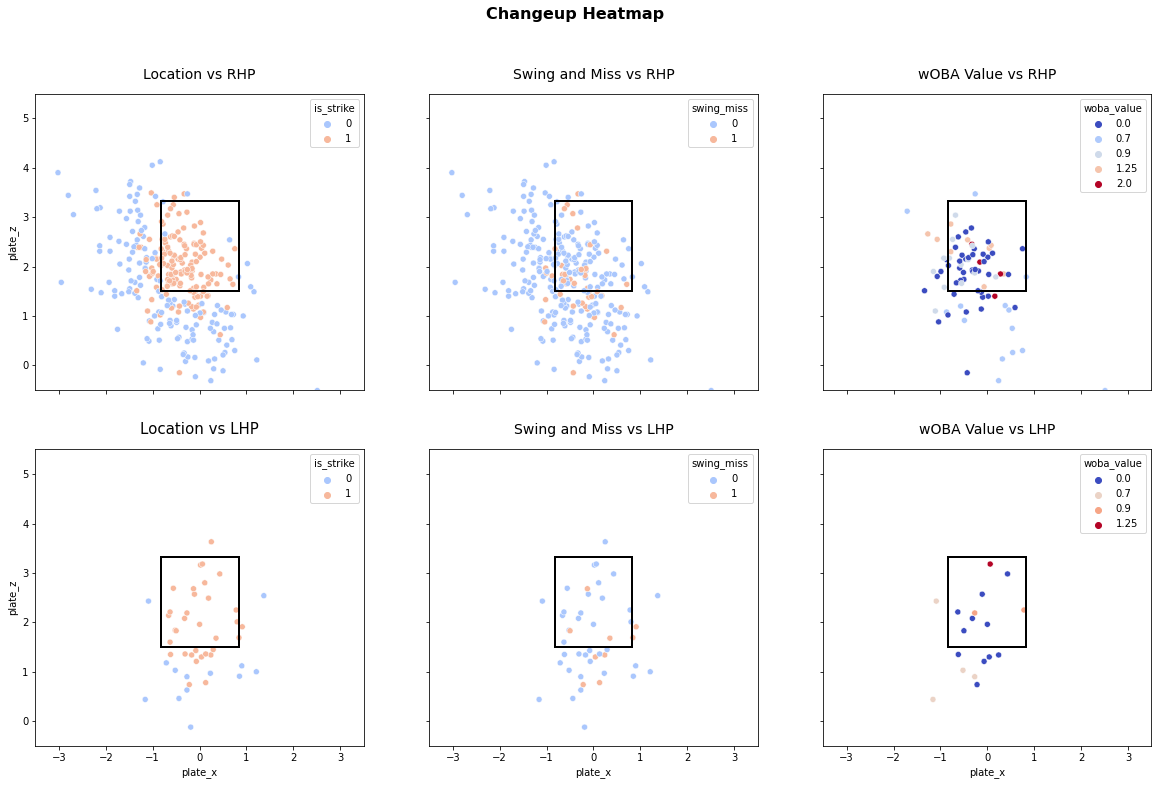

In [12]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Sinker Heatmaps

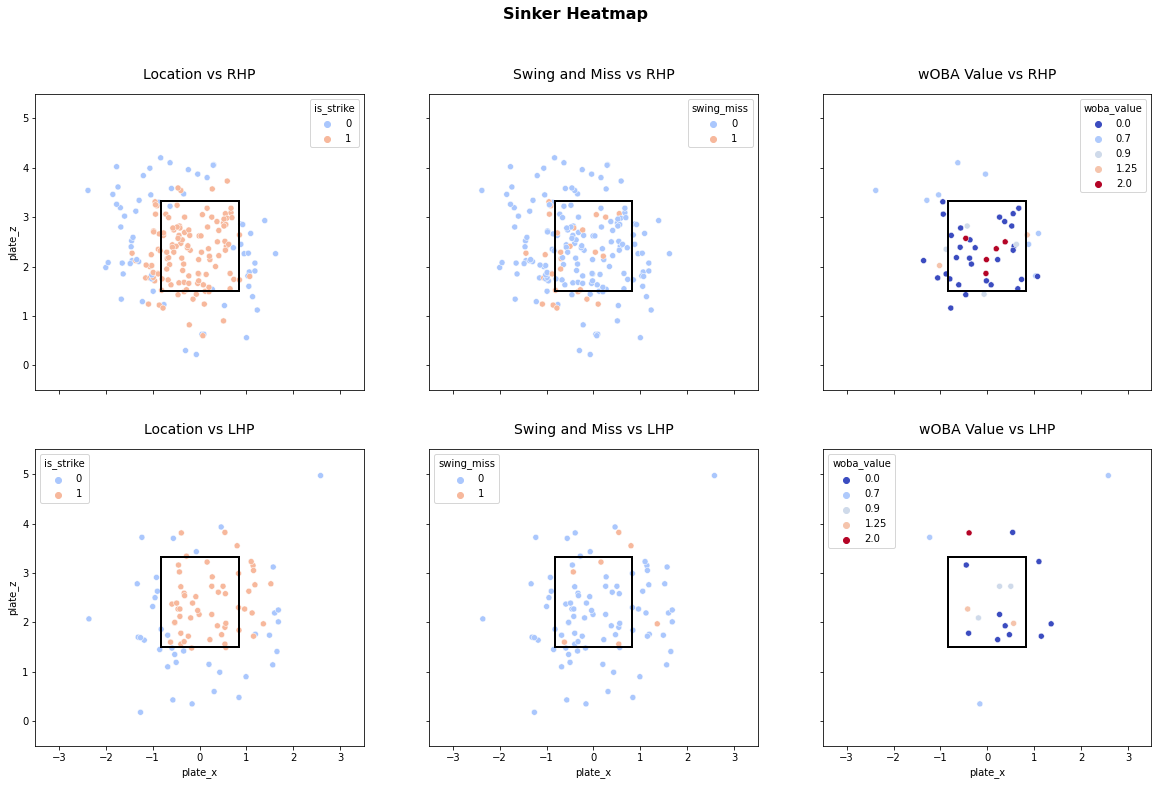

In [13]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Sinker Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Curveball Heatmaps

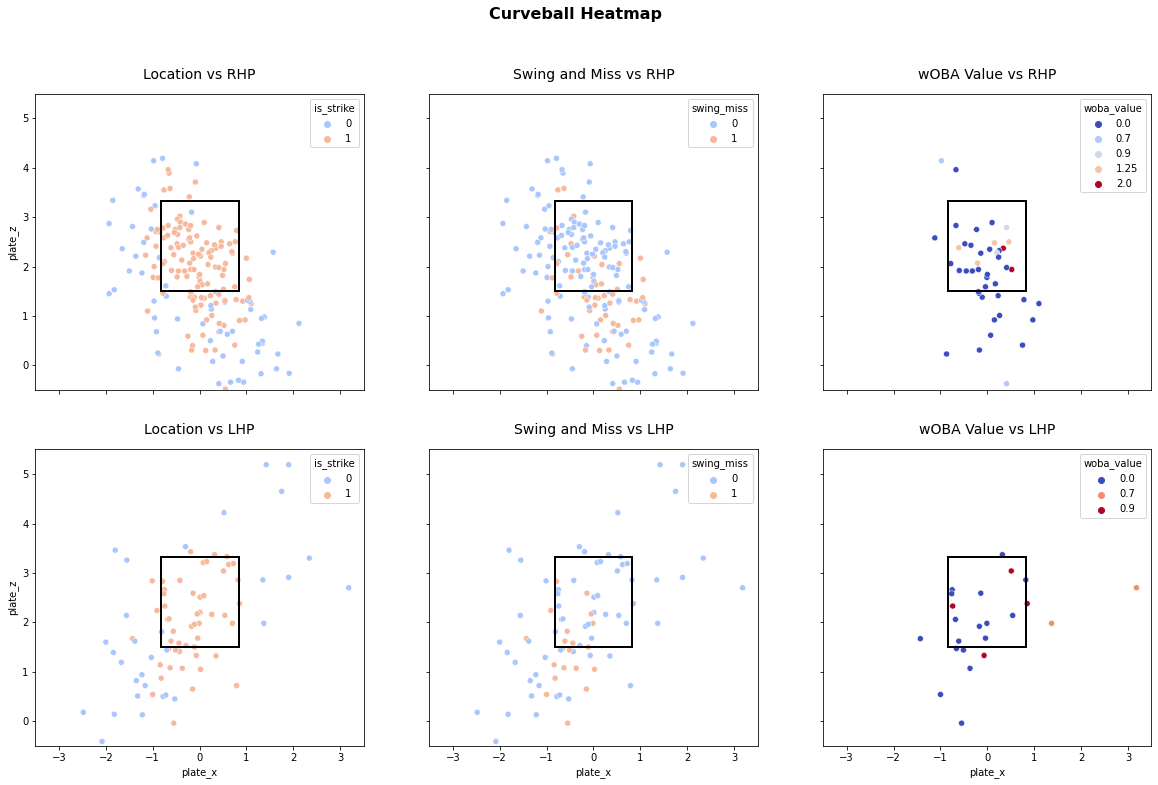

In [14]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Cutter Heatmaps

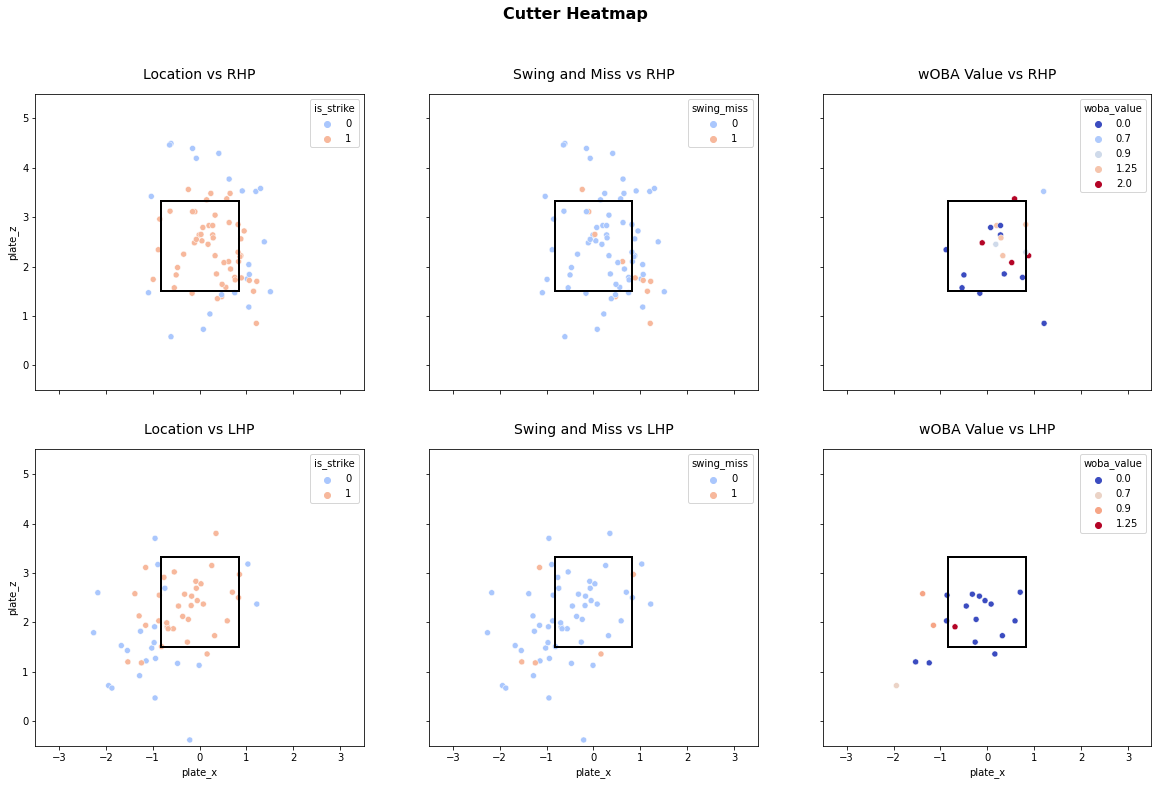

In [15]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Cutter Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Split-Finger Heatmaps

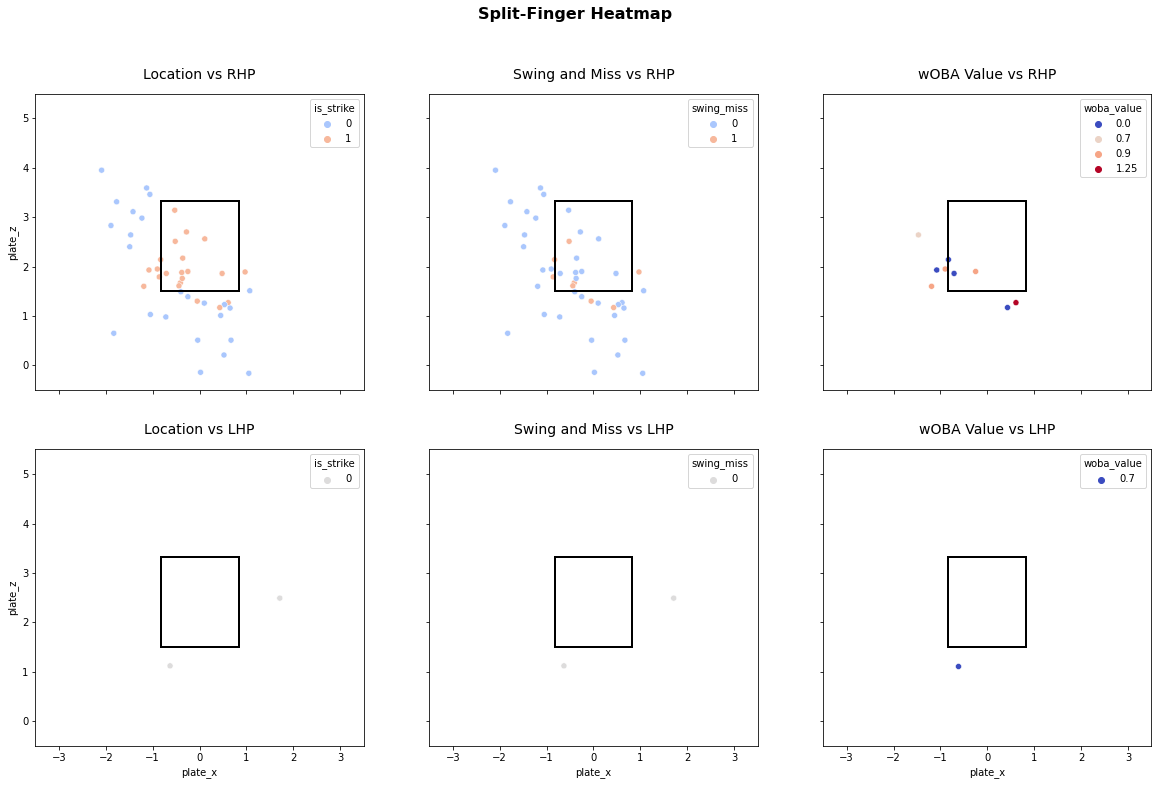

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Split-Finger Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Knuckle Curve Heatmaps

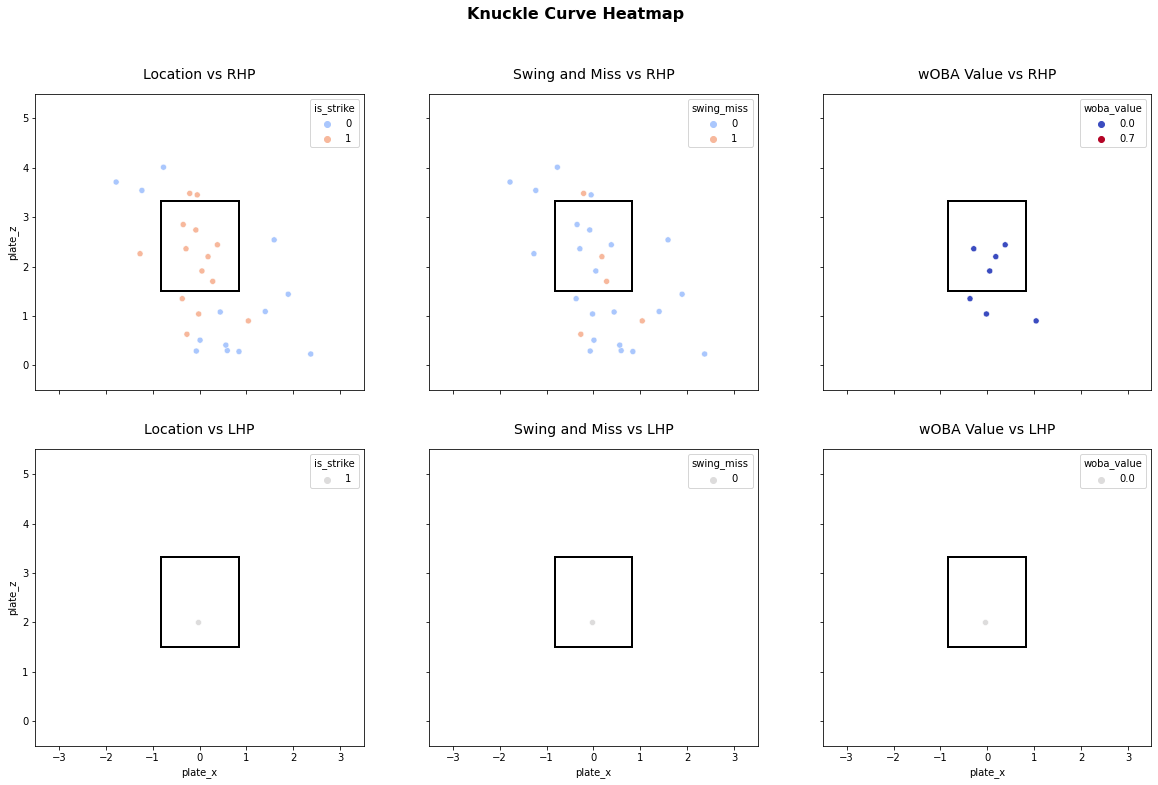

In [17]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Knuckle Curve Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Slow Curve Heatmaps

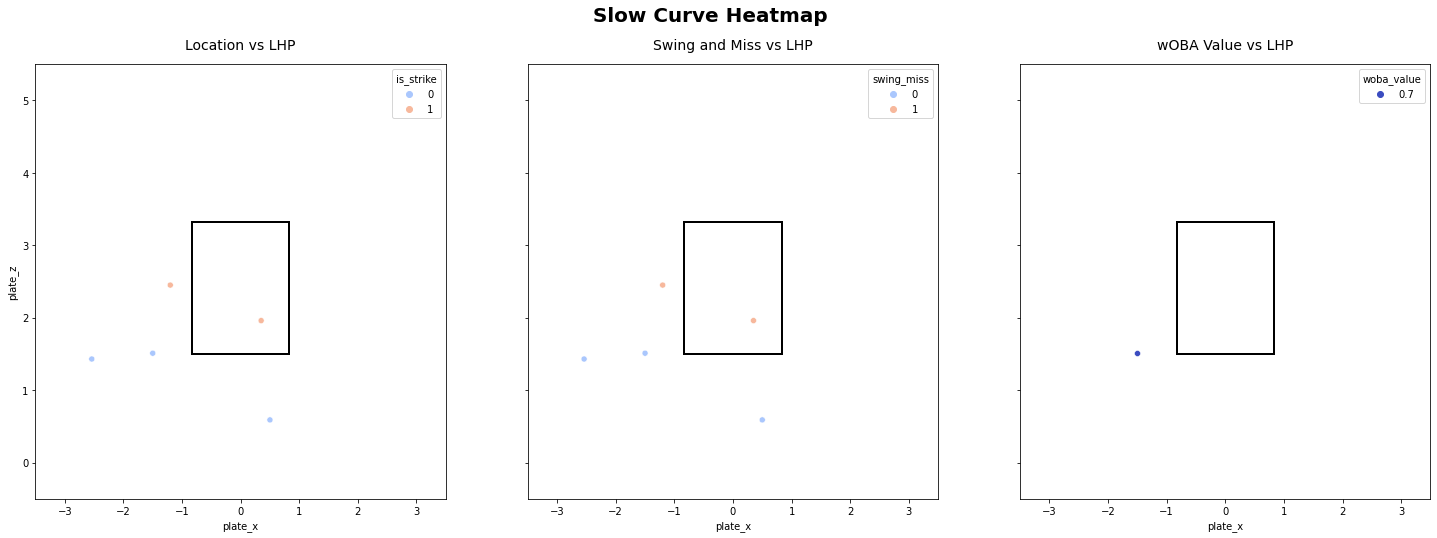

In [18]:
fig, axs = plt.subplots(1, 3, figsize = (25, 8), sharex = True, sharey = True)
fig.suptitle('Slow Curve Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);